# This is a first analysis on the data

For this analysis we begin by:
    1. Taking a singular value decomposition of both Dr. Binders data, and equivalent word2vec outputs
    2. Looking at the natural clustering in only the first 3 dimensions
    3. Calculating the correlation coefficient in the cosine distances between word pairs

<IPython.core.display.Javascript object>


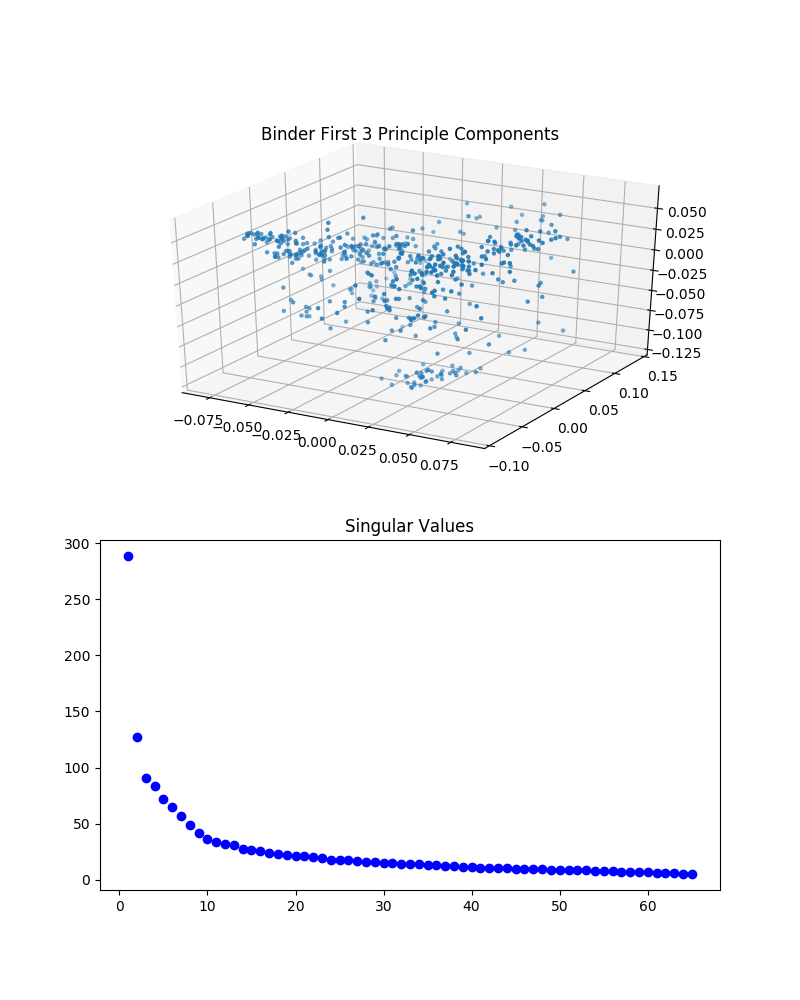

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Load Binder Data (I know it's ugly)
data = pd.read_excel('WordSet1_Ratings.xlsx', 'Sheet1')
vec = np.zeros([534, 65])
for row in range(0,534):
    for column in range(5,70):
        if data.iloc[row, column] == "na":
            vec[row, column-5] = 0
        else:
            vec[row, column-5] = data.iloc[row, column]

# Decompose and Plot
U, S, Vh = np.linalg.svd(vec)

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(2,1,1, projection='3d')
idk = ax.scatter(U[:,1], U[:,2], U[:,3], s=5)
ax.set_title('Binder First 3 Principle Components')

ax = fig.add_subplot(2,1,2)
ax.plot(np.arange(1, 66),S, 'bo')
ax.set_title('Singular Values')

plt.show()

<IPython.core.display.Javascript object>


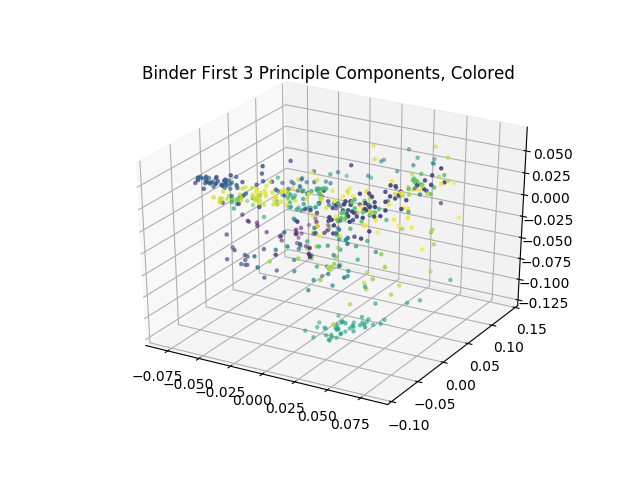

In [2]:
# Lets color code this to see if there are any interesting things
cats = list(set(data['Category']))
Scats = list(set(data['Super Category']))
word_c = np.zeros(534)
word_sc = np.zeros(534)
for idx in range(0,534):
    word_c[idx] = cats.index(data['Category'][idx])
    word_sc[idx] = Scats.index(data['Super Category'][idx])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
idk = ax.scatter(U[:,1], U[:,2], U[:,3], s=5, c=word_c)
ax.set_title('Binder First 3 Principle Components, Colored')
plt.show()


<IPython.core.display.Javascript object>


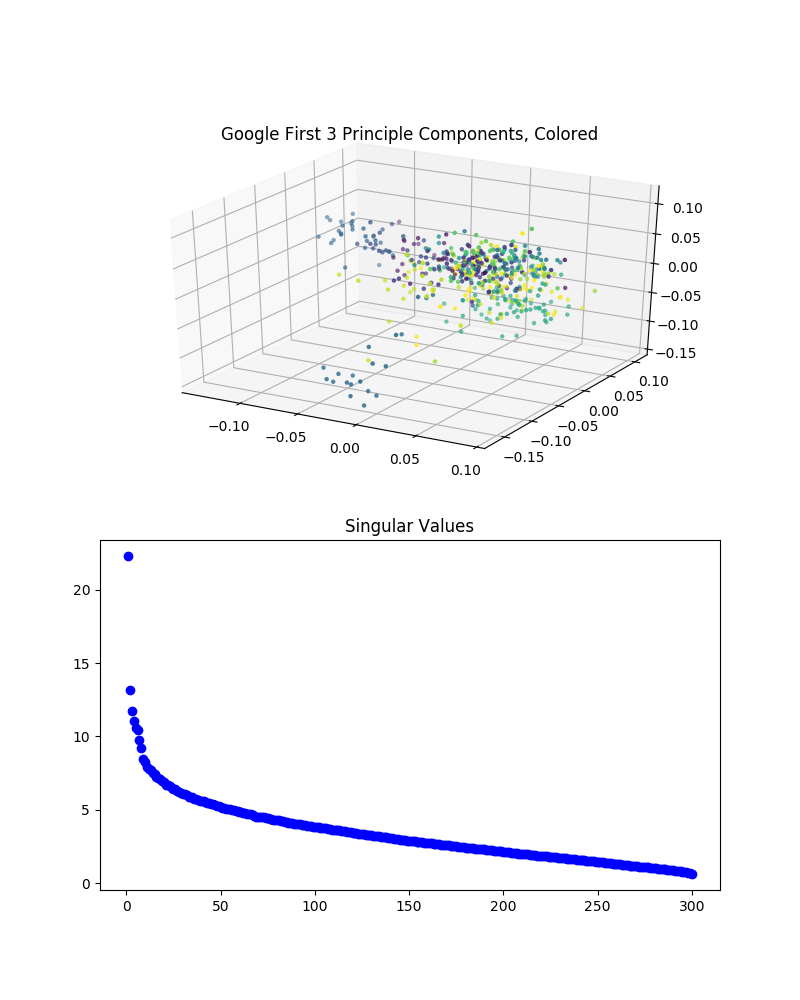

In [3]:
# We will load the google data as well, and plot the same
import json
with open('gDict.json', 'r') as handle:
    gDict = json.load(handle)
gVec = np.zeros([534,300])
for idx, word in enumerate(data['Word']):
    gVec[idx,:] = gDict[word][1]

# Decompose and Plot
U, S, Vh = np.linalg.svd(gVec)

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(2,1,1, projection='3d')
idk = ax.scatter(U[:,1], U[:,2], U[:,3], s=5, c=word_c)
ax.set_title('Google First 3 Principle Components, Colored')

ax = fig.add_subplot(2,1,2)
ax.plot(np.arange(1, 301),S, 'bo')
ax.set_title('Singular Values')

plt.show()

## How do they compare?
For this analysis, I thought we could look at the correlation coefficient for the cosine distances. Each of the rows of the two matrices correspond to the same word, so just a matrix multiplication and then taking the corr coef between two equivalent rows of the different matrices

<IPython.core.display.Javascript object>


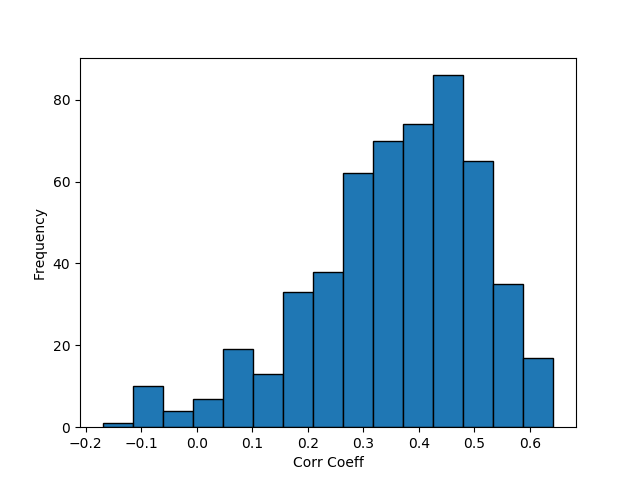

In [9]:
# Take Dot Product
angsB = np.matmul(vec,vec.T)
angsG = np.matmul(gVec,gVec.T)
# Just cross-corr Coefficients
coeff = np.zeros(534)
for idx in range(0,534):
    coeff[idx] = np.corrcoef(angsB[idx],angsG[idx])[0,1]
fig = plt.figure()
plt.hist(coeff,15, edgecolor='k')
plt.xlabel('Corr Coeff')
plt.ylabel('Frequency')
plt.show()

## The Result:
### Not Good
A correlation coefficent of .45 is not great, but it's okay. I guess we need a better check, or something ...

In [ ]:
vec[0]